### Association Rule Mining

Loading the data in the basket format to perform the association rule mining

In [136]:
library(arules)
library(arulesViz)

data <- read.transactions("data.csv",
                           rm.duplicates = FALSE, 
                           format = "basket",  
                           sep=",",  ## csv file
                           cols=1)
data

transactions in sparse format with
 35 transactions (rows) and
 11 items (columns)

The basket data has 35 rows and 10 unique items for this analysis

In [137]:
data <- data[1:20]

### Transaction Data

In [138]:
inspect(data)

     items              transactionID
[1]  {HEADPHONES,                    
      SMARTPHONE_CASE,               
      WALLET}                      1 
[2]  {CHAIR,                         
      SCREEN_CLEANER,                
      SMARTPHONE_CASE}             2 
[3]  {HDMI_CABLE,                    
      KEYBOARD,                      
      SCREEN GUARD,                  
      SCREEN_CLEANER}              3 
[4]  {CHARGER,                       
      HDMI_CABLE,                    
      HEADPHONES}                  4 
[5]  {HDMI_CABLE,                    
      SMARTPHONE,                    
      SMARTPHONE_CASE}             5 
[6]  {CHARGER,                       
      HDMI_CABLE,                    
      HEADPHONES,                    
      SMARTPHONE_CASE}             6 
[7]  {HDMI_CABLE,                    
      KEYBOARD,                      
      SCREEN GUARD,                  
      SCREEN_CLEANER}              7 
[8]  {CHAIR,                         
      SMARTP

### Association Rules  - Apriori


The rules are generated by using the frequent transactions that occurred together in the dataset.The algorithm explores the combination of different frequently occurred itemsets to find out the interesting patterns within the data while making sure the support of each transactions are above 4% and above the confidence of 6%.

In [139]:
rules <- apriori(data=data,parameter = list(supp=.04, conf=.06, minlen=2),
                    ,
                     control=list(verbose=FALSE))

inspect(rules)                                               

      lhs                   rhs               support confidence coverage       lift count
[1]   {TABLE}            => {SMARTPHONE}         0.05 0.50000000     0.10  2.0000000     1
[2]   {SMARTPHONE}       => {TABLE}              0.05 0.20000000     0.25  2.0000000     1
[3]   {TABLE}            => {CHARGER}            0.10 1.00000000     0.10  4.0000000     2
[4]   {CHARGER}          => {TABLE}              0.10 0.40000000     0.25  4.0000000     2
[5]   {TABLE}            => {HEADPHONES}         0.05 0.50000000     0.10  1.4285714     1
[6]   {HEADPHONES}       => {TABLE}              0.05 0.14285714     0.35  1.4285714     1
[7]   {TABLE}            => {SMARTPHONE_CASE}    0.10 1.00000000     0.10  1.5384615     2
[8]   {SMARTPHONE_CASE}  => {TABLE}              0.10 0.15384615     0.65  1.5384615     2
[9]   {KEYBOARD}         => {SCREEN GUARD}       0.10 0.66666667     0.15  2.2222222     2
[10]  {SCREEN GUARD}     => {KEYBOARD}           0.10 0.33333333     0.30  2.2222222     2

### Rules - Smartphone in the LHS

With this example we can see how this association rules can be helpful in recommending the products to the user.

In [140]:
rules <- apriori(data=data,parameter = list(supp=.04, conf=.06, minlen=2),
                     appearance = list(default="rhs", lhs="SMARTPHONE"),
                     control=list(verbose=FALSE))

inspect(rules)                                               

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {TABLE}           0.05    0.2        0.25     2.0000000
[2] {SMARTPHONE} => {CHARGER}         0.05    0.2        0.25     0.8000000
[3] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.4        0.25     1.3333333
[4] {SMARTPHONE} => {HEADPHONES}      0.05    0.2        0.25     0.5714286
[5] {SMARTPHONE} => {HDMI_CABLE}      0.10    0.4        0.25     1.1428571
[6] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.2        0.25     0.5000000
[7] {SMARTPHONE} => {SMARTPHONE_CASE} 0.20    0.8        0.25     1.2307692
    count
[1] 1    
[2] 1    
[3] 2    
[4] 1    
[5] 2    
[6] 1    
[7] 4    


### Association Rules sorted by Lift

Denotes the high association between the smartphone, this means that they are individually is less than compared to the purchase along with a smartphone.

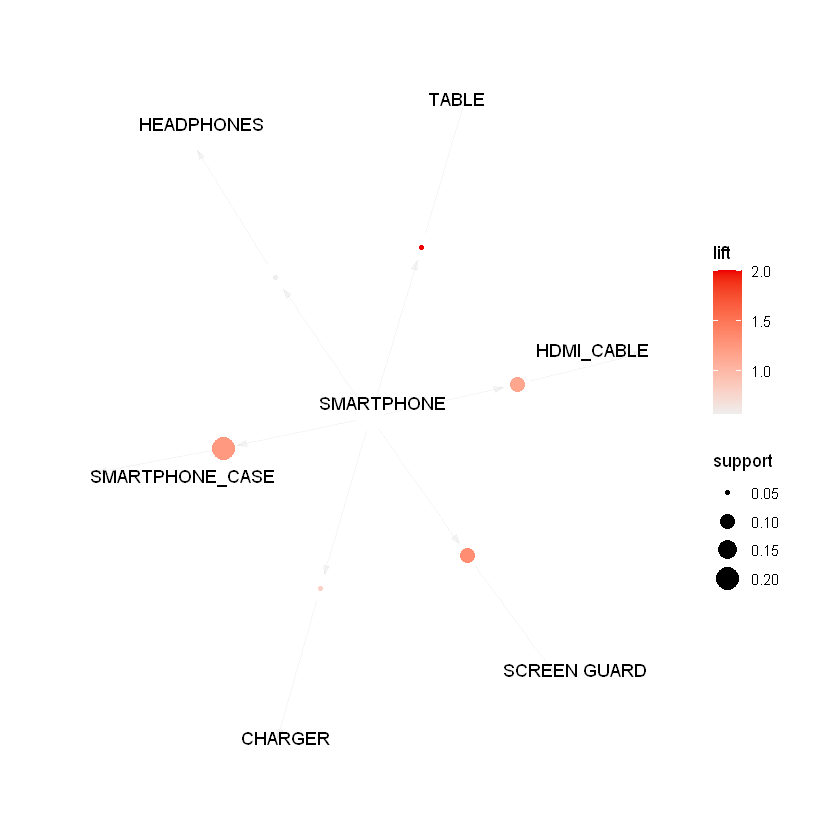

In [141]:
rules <- head(sort(rules, by="lift"))
plot(rules,method = "graph")  

### Association Rules sorted by Confidence

Denotes a strong correlation between the other products which can be used for recommendations, it is reliable indicator for their correlation strength.

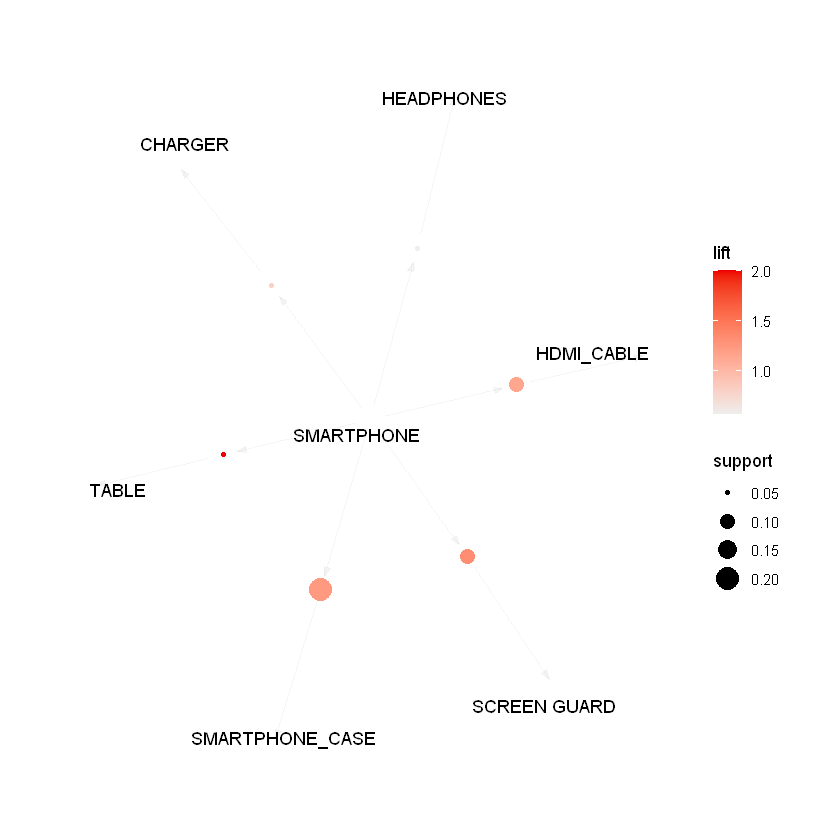

In [142]:
rules <- head(sort(rules, by="confidence"))
plot(rules,method = "graph")  

### Association Rules sorted by Support

Denotes the highly frequent item sets in the dataset which is just their repeated occurrence and popularity among the transactions.

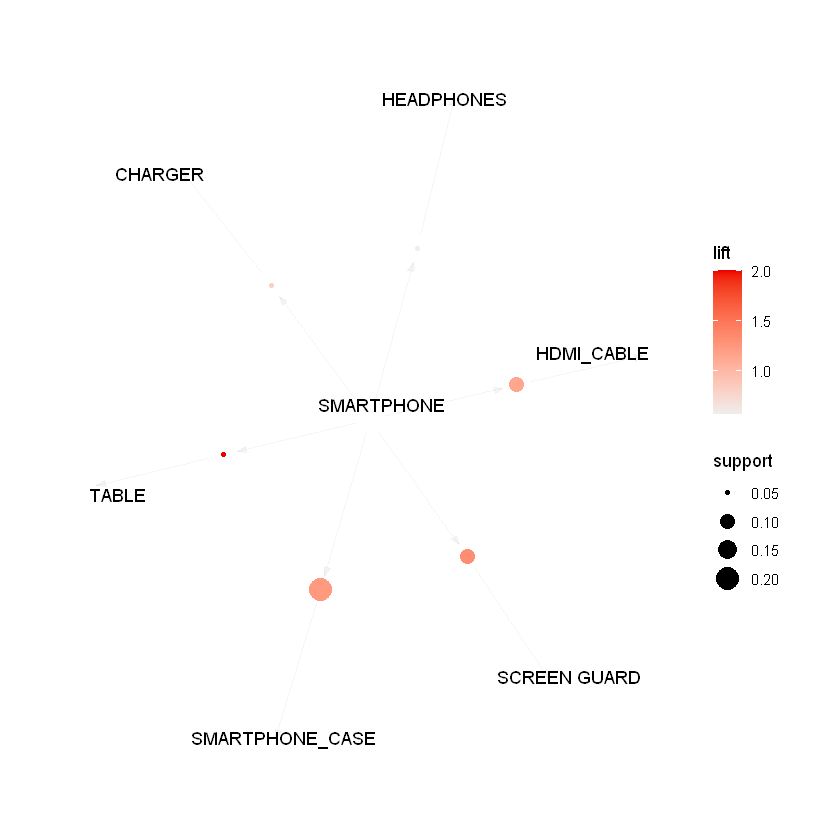

In [143]:
rules <- head(sort(rules, by="support"))
plot(rules,method = "graph")  

#### Top 5 Rules by Confidence

In [144]:
conf_rules <- sort(rules, decreasing=TRUE, by="confidence")
inspect(conf_rules[1:5])     

    lhs             rhs               support confidence coverage lift    
[1] {SMARTPHONE} => {SMARTPHONE_CASE} 0.20    0.8        0.25     1.230769
[2] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.4        0.25     1.333333
[3] {SMARTPHONE} => {HDMI_CABLE}      0.10    0.4        0.25     1.142857
[4] {SMARTPHONE} => {TABLE}           0.05    0.2        0.25     2.000000
[5] {SMARTPHONE} => {CHARGER}         0.05    0.2        0.25     0.800000
    count
[1] 4    
[2] 2    
[3] 2    
[4] 1    
[5] 1    


#### Top 5 Rules by Lift

In [145]:
lift_rules <- sort(rules, decreasing=TRUE, by="lift")
inspect(lift_rules[1:5])     

    lhs             rhs               support confidence coverage lift    
[1] {SMARTPHONE} => {TABLE}           0.05    0.2        0.25     2.000000
[2] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.4        0.25     1.333333
[3] {SMARTPHONE} => {SMARTPHONE_CASE} 0.20    0.8        0.25     1.230769
[4] {SMARTPHONE} => {HDMI_CABLE}      0.10    0.4        0.25     1.142857
[5] {SMARTPHONE} => {CHARGER}         0.05    0.2        0.25     0.800000
    count
[1] 1    
[2] 2    
[3] 4    
[4] 2    
[5] 1    


#### Top 5 Rules by Support

In [146]:
supp_rules <- sort(rules, decreasing=TRUE, by="support")
inspect(supp_rules[1:5])     

    lhs             rhs               support confidence coverage lift    
[1] {SMARTPHONE} => {SMARTPHONE_CASE} 0.20    0.8        0.25     1.230769
[2] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.4        0.25     1.333333
[3] {SMARTPHONE} => {HDMI_CABLE}      0.10    0.4        0.25     1.142857
[4] {SMARTPHONE} => {TABLE}           0.05    0.2        0.25     2.000000
[5] {SMARTPHONE} => {CHARGER}         0.05    0.2        0.25     0.800000
    count
[1] 4    
[2] 2    
[3] 2    
[4] 1    
[5] 1    


In conclusion, these rules are used generally by the eccommerce business to recommend other products to their customers based on their histrocial purchase.